<a href="https://colab.research.google.com/github/ojasrai17/IP_miniproject/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

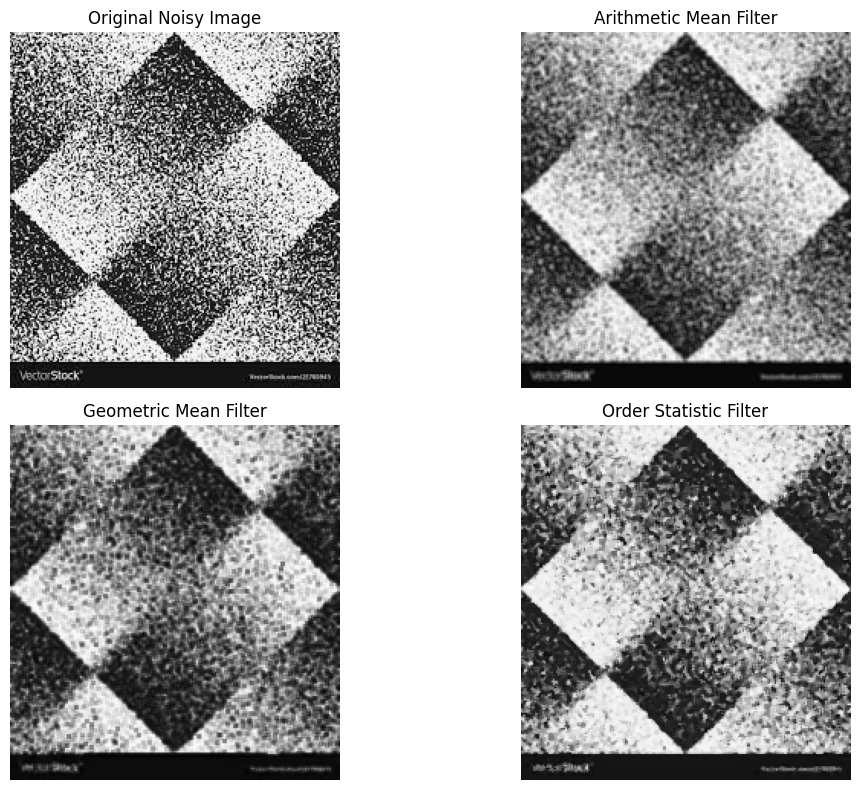

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

def arithmetic_mean_filter(image, kernel_size=3):
    """Apply arithmetic mean filter."""
    return uniform_filter(image, size=kernel_size)

def geometric_mean_filter(image, kernel_size=3):
    """Apply geometric mean filter."""
    kernel = np.ones((kernel_size, kernel_size))
    padded_image = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.exp(np.mean(np.log(window[window > 0])))

    return np.clip(output, 0, 255).astype(np.uint8)

def order_statistic_filter(image, kernel_size=3):
    """Apply order statistic filter (median filter)."""
    return cv2.medianBlur(image, kernel_size)

def compare_filters(original, arith_mean, geom_mean, order_statistic):
    """Display original and filtered images."""
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.title('Original Noisy Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Arithmetic Mean Filter')
    plt.imshow(arith_mean, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Geometric Mean Filter')
    plt.imshow(geom_mean, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Order Statistic Filter')
    plt.imshow(order_statistic, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the original noisy image (grayscale)
image_path = '/content/images.jpg'  # Update with your image path
original_noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply filters
arithmetic_mean_output = arithmetic_mean_filter(original_noisy_image, kernel_size=3)
geometric_mean_output = geometric_mean_filter(original_noisy_image, kernel_size=3)
order_statistic_output = order_statistic_filter(original_noisy_image, kernel_size=3)

# Compare outputs
compare_filters(original_noisy_image, arithmetic_mean_output, geometric_mean_output, order_statistic_output)